# Runtime analysis

## Loading the data

Import the necessary packages:

In [2]:
import pandas as pd
import numpy as np
from trails.optimizer import trans_emiss_calc, loglik_wrapper, loglik_wrapper_par
from trails.read_data import maf_parser
from trails.cutpoints import cutpoints_ABC
from tqdm import tqdm
import time
%load_ext rpy2.ipython

n_int_AB_original = 1
n_int_ABC_original = 5

n_int_AB = 5
n_int_ABC = 5

/Users/au595587/opt/miniconda3/envs/trails_plot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
obs = maf_parser('../../chr1/data/chr1.filtered.30000000.region.maf', ['hg38','panTro5','gorGor5','ponAbe2'])

In [22]:
len(obs)

53

In [23]:
acc = 0
for i in obs:
    acc += len(i)
acc

919099

Load the data:

In [24]:
# Read the output from TRAILS
df = pd.read_csv('../../chr1/results/chr1_Nelder-Mead_third_run.csv')
# Find iteration with largest likelihood
df = df[df['loglik'] == df['loglik'].max()]
# Convert parameter estimates into dictionary
dct = dict(zip(list(df.columns), df.iloc[0].to_list()))

In [25]:
# Print dictionary
dct

{'n_eval': 136.0,
 't_A': 0.0027561296181322,
 't_B': 0.0029189333873319,
 't_C': 0.0058515616197657,
 't_2': 0.0024428164101813,
 't_upper': 0.0040645452754154,
 'N_AB': 0.0041849972728295,
 'N_ABC': 0.0025322380849019,
 'r': 0.9527482356906288,
 'loglik': -76112897.5348381,
 'time': 413789.77893161774}

In [36]:
n_int_AB = 6
n_int_ABC = 6

print('Initialization')
cut_ABC_original = cutpoints_ABC(n_int_ABC_original, 1)*dct["N_ABC"]
t_ABC = cut_ABC_original[-2]+dct["t_upper"]
cut_ABC = (cutpoints_ABC(n_int_ABC, 1)*dct["N_ABC"])
cut_ABC_last = cut_ABC[-2]
t_upper = t_ABC-cut_ABC_last
t_out = (((dct["t_A"]+dct["t_B"])/2+dct["t_2"])+dct["t_C"])/2 + cut_ABC_original[n_int_ABC_original-1]*dct["N_ABC"] + dct["t_upper"] + 2*dct["N_ABC"]
t_D = (((dct["t_A"]+dct["t_B"])/2+dct["t_2"])+dct["t_C"])/2 + cut_ABC_original[n_int_ABC_original-1]*dct["N_ABC"] + dct["t_upper"]
t_1 = time.time()
a, b, pi, hidden_names, observed_names = trans_emiss_calc(
    dct["t_A"], dct["t_B"], dct["t_C"], dct["t_2"], t_upper, t_out, 
    dct["N_AB"], dct["N_ABC"], dct["r"], n_int_AB, n_int_ABC)
t_2 = time.time()
print(t_2-t_1)
loglik = loglik_wrapper(a, b, pi, obs)
t_3 = time.time()
print((t_2-t_1, t_3-t_2))

Initialization
251.52381706237793
(251.52381706237793, 84.3139419555664)


In [35]:
(243.72135496139526, 55.95101475715637)

(243.72135496139526, 55.95101475715637)

In [5]:
n_int_AB = 5
n_int_ABC = 5

time_1 = [] 
time_2 = [] 
time_3 = [] 
n_int_AB_lst = [] 
n_int_ABC_lst = [] 
rep_lst = [] 


for rep in range(3):
    for n_int_AB in range(1, 8):
        for n_int_ABC in range(1, 8):
            print(n_int_AB, n_int_ABC, rep)
            n_int_AB_lst.append(n_int_AB)
            n_int_ABC_lst.append(n_int_ABC)
            rep_lst.append(rep)
            cut_ABC_original = cutpoints_ABC(n_int_ABC_original, 1)*dct["N_ABC"]
            t_ABC = cut_ABC_original[-2]+dct["t_upper"]
            cut_ABC = (cutpoints_ABC(n_int_ABC, 1)*dct["N_ABC"])
            cut_ABC_last = cut_ABC[-2]
            t_upper = t_ABC-cut_ABC_last
            t_out = (((dct["t_A"]+dct["t_B"])/2+dct["t_2"])+dct["t_C"])/2 + cut_ABC_original[n_int_ABC_original-1]*dct["N_ABC"] + dct["t_upper"] + 2*dct["N_ABC"]
            t_D = (((dct["t_A"]+dct["t_B"])/2+dct["t_2"])+dct["t_C"])/2 + cut_ABC_original[n_int_ABC_original-1]*dct["N_ABC"] + dct["t_upper"]
            time_1.append(time.time())
            a, b, pi, hidden_names, observed_names = trans_emiss_calc(
                dct["t_A"], dct["t_B"], dct["t_C"], dct["t_2"], t_upper, t_out, 
                dct["N_AB"], dct["N_ABC"], dct["r"], n_int_AB, n_int_ABC)
            time_2.append(time.time())
            loglik = loglik_wrapper(a, b, pi, obs)
            time_3.append(time.time())

1 1 0
1 1 1
1 1 2
1 1 3
1 1 4
1 2 0
1 2 1
1 2 2
1 2 3
1 2 4
1 3 0


2023-11-03 19:46:08,305	INFO worker.py:1625 -- Started a local Ray instance.


1 3 1
1 3 2
1 3 3
1 3 4
1 4 0
1 4 1
1 4 2
1 4 3
1 4 4
1 5 0
1 5 1
1 5 2
1 5 3
1 5 4
1 6 0
1 6 1
1 6 2
1 6 3
1 6 4
1 7 0
1 7 1
1 7 2
1 7 3
1 7 4
2 1 0
2 1 1
2 1 2
2 1 3
2 1 4
2 2 0
2 2 1
2 2 2
2 2 3
2 2 4
2 3 0
2 3 1
2 3 2
2 3 3
2 3 4
2 4 0
2 4 1
2 4 2
2 4 3
2 4 4
2 5 0
2 5 1
2 5 2
2 5 3
2 5 4
2 6 0
2 6 1
2 6 2
2 6 3
2 6 4
2 7 0
2 7 1
2 7 2
2 7 3
2 7 4
3 1 0
3 1 1
3 1 2
3 1 3
3 1 4
3 2 0
3 2 1
3 2 2
3 2 3
3 2 4
3 3 0
3 3 1
3 3 2
3 3 3
3 3 4
3 4 0
3 4 1
3 4 2
3 4 3
3 4 4
3 5 0
3 5 1
3 5 2
3 5 3
3 5 4
3 6 0
3 6 1
3 6 2
3 6 3
3 6 4
3 7 0
3 7 1
3 7 2
3 7 3
3 7 4
4 1 0
4 1 1
4 1 2
4 1 3
4 1 4
4 2 0
4 2 1
4 2 2
4 2 3
4 2 4
4 3 0
4 3 1
4 3 2
4 3 3
4 3 4
4 4 0
4 4 1
4 4 2
4 4 3
4 4 4
4 5 0
4 5 1
4 5 2
4 5 3
4 5 4
4 6 0
4 6 1
4 6 2
4 6 3
4 6 4
4 7 0
4 7 1
4 7 2
4 7 3
4 7 4
5 1 0
5 1 1
5 1 2
5 1 3
5 1 4
5 2 0
5 2 1
5 2 2
5 2 3
5 2 4
5 3 0
5 3 1
5 3 2
5 3 3
5 3 4
5 4 0
5 4 1
5 4 2
5 4 3
5 4 4
5 5 0
5 5 1
5 5 2
5 5 3
5 5 4
5 6 0
5 6 1
5 6 2
5 6 3
5 6 4
5 7 0
5 7 1
5 7 2
5 7 3
5 7 4
6 1 0
6 1 1
6 1 

In [6]:
dat = pd.DataFrame()
dat['n_int_AB'] = n_int_AB_lst
dat['n_int_ABC'] = n_int_ABC_lst
dat['rep'] = rep_lst
dat['time_trans'] = np.array(time_2)-np.array(time_1)
dat['time_post'] = np.array(time_3)-np.array(time_2)
dat.to_csv('runtime.csv', index = False)

In [3]:
%%R

library(tidyverse)

df <- read_csv('runtime_1.csv')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 245 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): n_int_AB, n_int_ABC, rep, time_trans, time_post

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`summarise()` has grouped output by 'n_int_AB'. You can override using the
`.groups` argument.


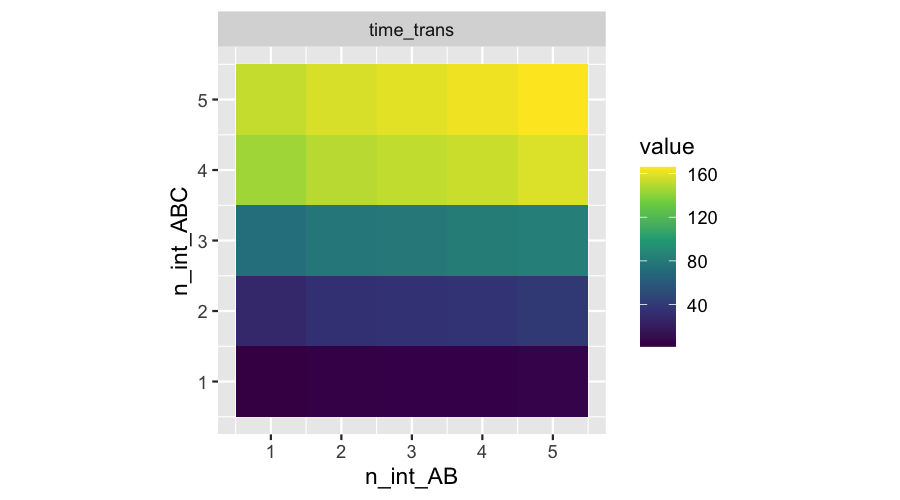

In [45]:
%%R -w 900 -h 500 -r 150 

df %>%
    group_by(n_int_AB, n_int_ABC) %>%
    summarize(time_trans = median(time_trans), time_post = median(time_post)) %>%
    pivot_longer(c(time_trans, time_post)) %>%
    filter(name == 'time_trans') %>%
    filter(n_int_AB <= 5, n_int_ABC <= 5) %>%
    ggplot() +
    geom_tile(aes(n_int_AB, n_int_ABC, fill = value)) +
    facet_wrap(~name) +
    scale_fill_viridis_c() +
    coord_fixed()

`summarise()` has grouped output by 'n_int_AB'. You can override using the
`.groups` argument.


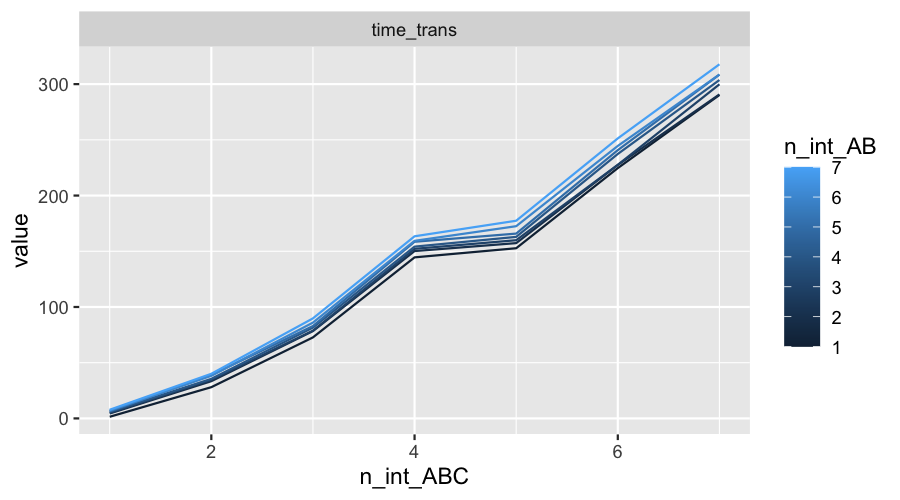

In [17]:
%%R -w 900 -h 500 -r 150 

df %>%
    group_by(n_int_AB, n_int_ABC) %>%
    summarize(time_trans = median(time_trans), time_post = median(time_post)) %>%
    pivot_longer(c(time_trans, time_post)) %>%
    filter(name == 'time_trans') %>%
    ungroup() %>%
    ggplot() +
    geom_line(aes(n_int_ABC, value, color = n_int_AB, group = n_int_AB)) +
    facet_wrap(~name) 

`summarise()` has grouped output by 'n_int_AB'. You can override using the
`.groups` argument.


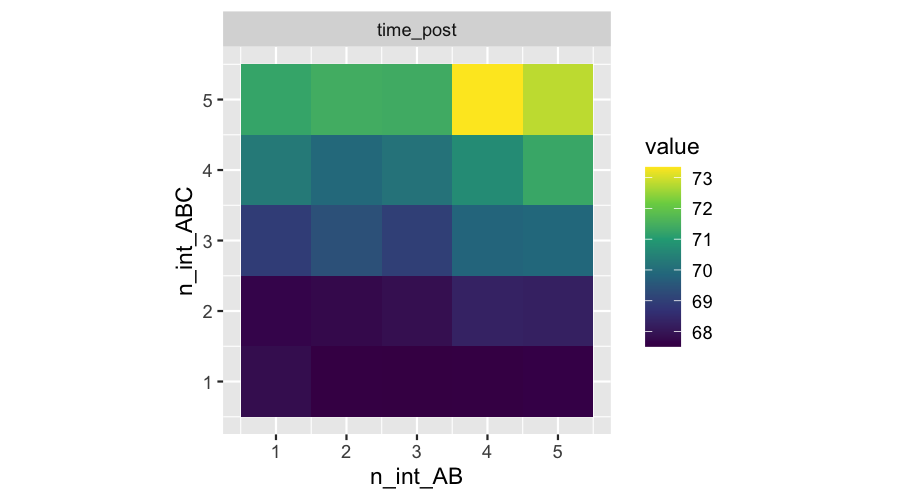

In [44]:
%%R -w 900 -h 500 -r 150 

df %>%
    group_by(n_int_AB, n_int_ABC) %>%
    summarize(time_trans = median(time_trans), time_post = median(time_post)) %>%
    pivot_longer(c(time_trans, time_post)) %>%
    filter(name == 'time_post') %>%
    filter(n_int_AB <= 5, n_int_ABC <= 5) %>%
    ggplot() +
    geom_tile(aes(n_int_AB, n_int_ABC, fill = value)) +
    facet_wrap(~name) +
    scale_fill_viridis_c() +
    coord_fixed()

In [23]:
%%R

choose(2, 4)

[1] 0


`summarise()` has grouped output by 'n_int_AB'. You can override using the
`.groups` argument.


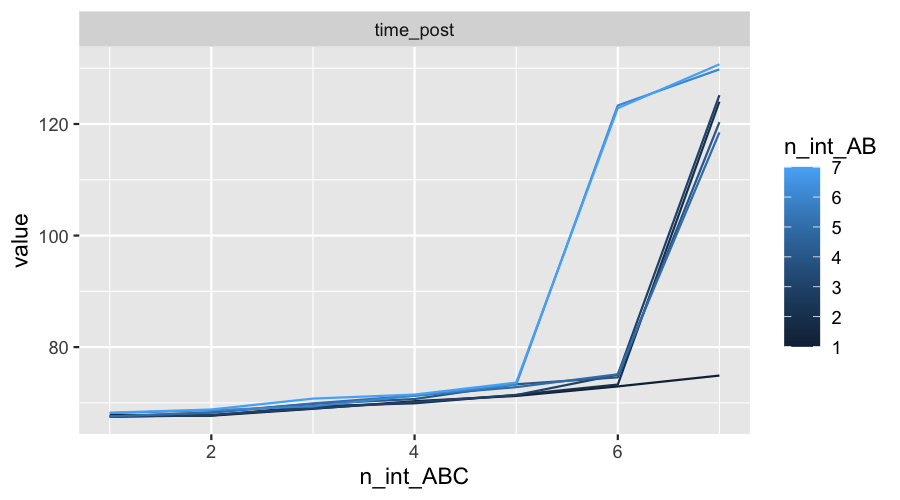

In [18]:
%%R -w 900 -h 500 -r 150 

df %>%
    group_by(n_int_AB, n_int_ABC) %>%
    summarize(time_trans = median(time_trans), time_post = median(time_post)) %>%
    pivot_longer(c(time_trans, time_post)) %>%
    filter(name == 'time_post') %>%
    ungroup() %>%
    mutate(
        nstates = n_int_AB*n_int_ABC+n_int_ABC*3+3*choose(n_int_ABC, 2)
    ) %>%
    ggplot() +
    geom_line(aes(n_int_ABC, value, color = n_int_AB, group = n_int_AB)) +
    facet_wrap(~name) 

In [6]:
%%R -w 900 -h 500 -r 150 

library(ggthemes)

df %>%
    filter(n_int_AB <= 5, n_int_ABC <= 5) %>%
    # filter(n_int_ABC <= 6) %>%
    group_by(n_int_AB, n_int_ABC) %>%
    summarize(time_trans = median(time_trans), time_post = median(time_post)) %>%
    pivot_longer(c(time_trans, time_post)) %>%
    # filter(name != 'time_trans') %>%
    ungroup() %>%
    mutate(
        nstates = n_int_AB*n_int_ABC+n_int_ABC*3+3*choose(n_int_ABC, 2)
    ) %>%
    ggplot() +
    geom_line(aes(nstates, value, 
        linetype = name, 
        color = as.character(n_int_ABC)
        )
    ) +
    geom_text(aes(
        nstates, value, 
        label = n_int_AB,
        # color = as.character(n_int_AB)        
        )
    ) +
    theme_bw() +
    labs(x = 'Number of hidden states', y = 'Time (seconds)', linetype = 'Type', color = 'N_ABC') +
    scale_linetype_manual(breaks = c('time_trans', 'time_post'), values = c(2, 1), labels = c('Transition matrix', 'Log-likelihood'))

ggsave('runtime.pdf', width = 6, height = 4)

`summarise()` has grouped output by 'n_int_AB'. You can override using the
`.groups` argument.
